In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/student_exam_data.csv')
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [29]:
df.dtypes

,0
Study Hours,float64
Previous Exam Score,float64
Pass/Fail,int64


In [5]:
df.shape

(500, 3)

In [6]:
df.columns

Index(['Study Hours', 'Previous Exam Score', 'Pass/Fail'], dtype='object')

In [8]:
print("Sum of null values: ")
print(df.isnull().sum())
print("Percentage of null values: ")
print(df.isnull().sum() * 100 / len(df))


Sum of null values: 
Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64
Percentage of null values: 
Study Hours            0.0
Previous Exam Score    0.0
Pass/Fail              0.0
dtype: float64


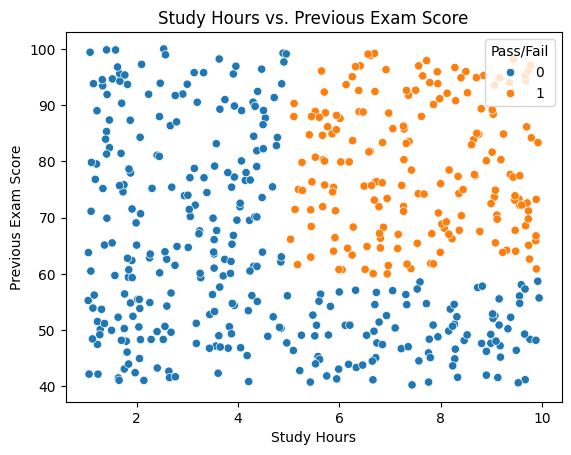

In [21]:
sns.scatterplot(x='Study Hours', y='Previous Exam Score', hue='Pass/Fail', data=df)
plt.title('Study Hours vs. Previous Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.show()

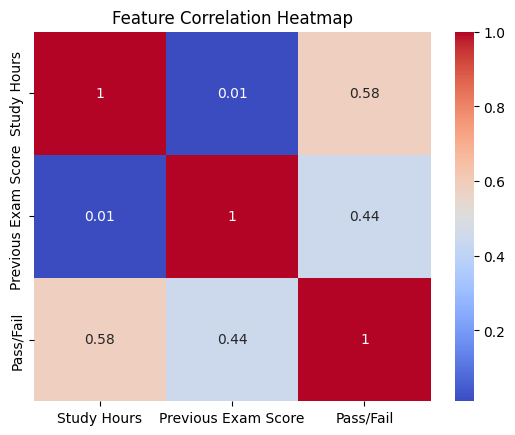

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

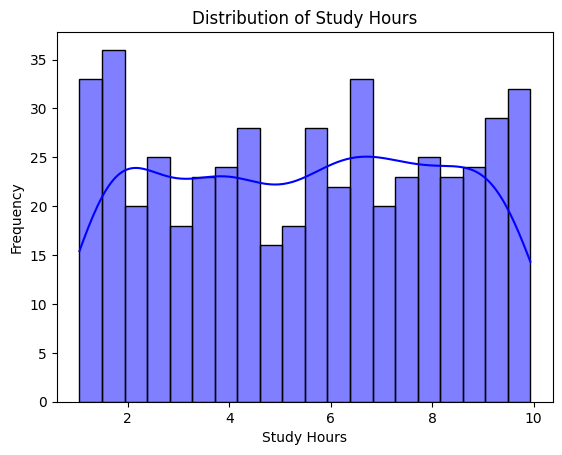

In [34]:
sns.histplot(df['Study Hours'], bins=20, kde=True, color='blue')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show


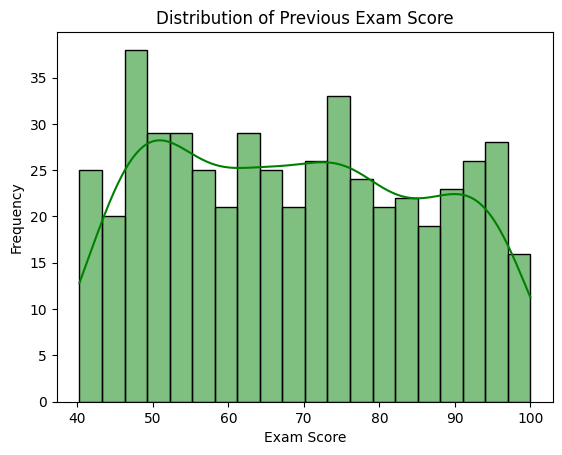

In [33]:
sns.histplot(df['Previous Exam Score'], bins=20, kde=True, color='green')
plt.title('Distribution of Previous Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

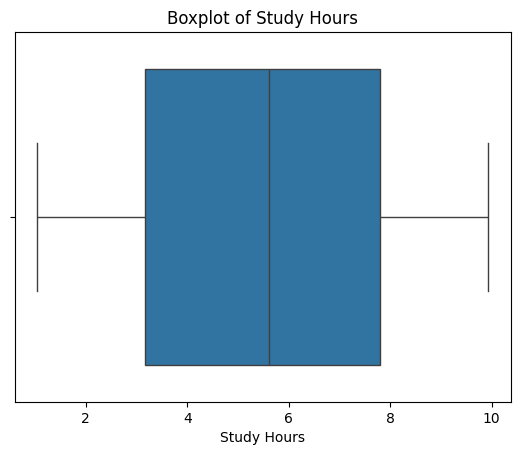

In [36]:
sns.boxplot(x=df['Study Hours'])
plt.title('Boxplot of Study Hours')
plt.show()

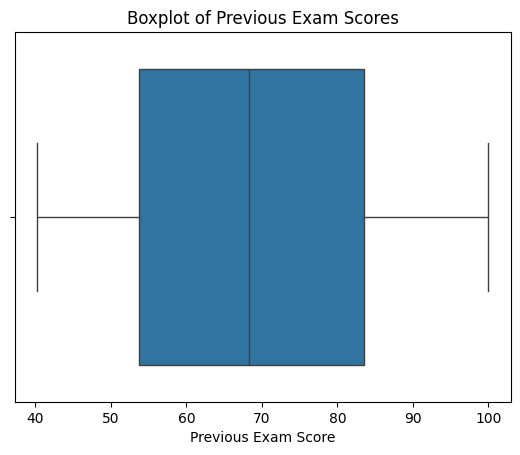

In [37]:
sns.boxplot(x=df['Previous Exam Score'])
plt.title('Boxplot of Previous Exam Scores')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['Study Hours', 'Previous Exam Score']]
y = df['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

study_hours = float(input("Enter study hours: "))
previous_exam_score = float(input("Enter previous exam score: "))
prediction = rf_model.predict([[study_hours, previous_exam_score]])
result = "Pass" if prediction[0] == 1 else "Fail"
print(f"Predicted Result: {result}")


Model Accuracy: 99.00%
Enter study hours: 20
Enter previous exam score: 99
Predicted Result: Pass


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
